N-Queens Problem solution assignment (SW_ADS1 course assignment 02)

The goal is to place N queens on an 
N × N chessboard such that no two queens threaten each other, meaning:

- No two queens can be in the same row.
- No two queens can be in the same column.
- No two queens can be in the same diagonal.

In [1]:
def is_valid(board, row, col):
    # Check if placing a queen at (row, col) is safe
    for i in range(row):
        # Check if any queen is in the same column or in a diagonal position
        # Check for same column:
        if (board[i] == col or \ 
            #Check for diagonals:
           board[i] - i == col - row or \ 
           board[i] + i == col + row):
            return False
    return True

def solve_nqueens(N):
    def backtrack(row):
        # Base case: if row == N, all rows have a queen, therefore the board is added to solutions
        if row == N:
            solutions.append(board[:])
            return True
        # For each column in the row, check if it's valid to place a queen
        for col in range(N):
            if is_valid(board, row, col): 
                board[row] = col # Placing the queen
                if backtrack(row + 1):  # Proceed with the next row
                    return True # If branch is successful, return true to end search
                board[row] = -1  # If placing the queen doesn't lead to a solution, reset the row and backtrack
        return False
    
    # Initialize the board with -1 (no queens placed initially)
    board = [-1] * N
    solutions = []
    backtrack(0)
    return solutions[0] if solutions else []

# Find and print a solution for N = 8
N = 8
solution = solve_nqueens(N)
print("Solution for N=8:", solution)

Solution for N=8: [0, 4, 7, 5, 2, 6, 1, 3]


Chessboard representation: 

The chessboard is represented as a 1-dimensional array, where each index represents a row, and the value of the index represents the column in the row where
a queen is placed.
This approach also helps with managing row constrains, as there is no need for such in the implementation, because a row can only contain 1 queen.

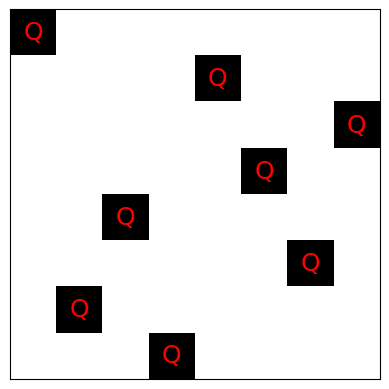

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_nqueens_solution(solution):
    N = len(solution)
    board = np.zeros((N, N))

    # Place queens on the board
    for row, col in enumerate(solution):
        board[row, col] = 1

    # Create the plot
    fig, ax = plt.subplots()
    ax.matshow(board, cmap="binary")

    # Add text to denote queens
    for i in range(N):
        for j in range(N):
            if board[i, j] == 1:
                ax.text(j, i, "Q", va='center', ha='center', color="red", fontsize=18)

    plt.xticks([])
    plt.yticks([])
    plt.show()

# Visualize the solution for N=8
plot_nqueens_solution(solution)